<a href="https://colab.research.google.com/github/NassarHQ/DropAlert/blob/main/DropAlert_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DropAlert - Predicting Student Dropout and Academic Success

**Authors:** Mohammed Nassar & Prajesh Sharma  
**Course:** CS-171 Sec 03
**Professor:** Dr. Nagib Hakim  
**Project:** Student Dropout Analysis and Prediction  
**Date:** April 10, 2025

---

This project aims to analyze the student dataset to identify key factors that influence whether a student drops out, remains enrolled, or graduates. Through data preparation, visualization, and future predictive modeling, we will explore academic, financial, demographic, and external factors that impact student outcomes.

# Dataset Description

**Project Goal:**  
The goal of this project is to determine which factors in the student dataset have the most impact on whether a student drops out, stays enrolled, or graduates. By analyzing academic performance, financial status, demographics, and external economic factors, we aim to identify the key reasons behind student dropout. This will help educational institutions take proactive steps to improve student retention.

**Dataset:**  
The dataset is called **“Predict Students' Dropout and Academic Success”**, based on Realinho et al., 2021. It contains information about:
- **Academic Information:** Grades, enrollment data, academic standing.
- **Financial Status:** Tuition fees, scholarship status, payment history.
- **Demographics:** Age, gender, marital status, nationality, parents' education.
- **External Economic Factors:** Unemployment rate, inflation, GDP.

**Target Variable:**  
- The target variable is called **Target**, which shows the student status:
  - **Dropout**
  - **Enrolled**
  - **Graduate**

**Dataset Size:**
- Total rows: 4,424 students
- Total columns (features): 37

**Goal of this notebook:**  
Prepare and clean the data, visualize important insights, and get the dataset ready for building baseline models such as Logistic Regression and XGBoost.


### Step 1: Import Libraries
We start by importing necessary libraries such as pandas for data manipulation and Google Colab tools for accessing files from Google Drive.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import shap
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step 2: Load the Dataset
We load the dataset from Google Drive and read it into a pandas DataFrame.


In [ ]:
dataset_path = '/content/drive/MyDrive/DropAlert/data.csv'
df = pd.read_csv(dataset_path)

### Step 3: Initial Data Inspection and Cleaning
We print the first few rows of the dataset, check original column names, dataset shape, and clean the column names for readability.

In [ ]:
# Show the first few rows
df.head()

# Show the original column names (before cleaning)
print("Original column names:")
print(df.columns)

# Show the shape of the data (rows, columns)
print("Dataset shape (rows, columns):")
print(df.shape)

# Clean the column names to remove spaces and tabs
df.columns = df.columns.str.strip().str.replace('\t', '')

# Show cleaned column names, one per line for readability
print("Cleaned column names:")
for col in df.columns:
    print(col)


Original column names:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
     

### Step 4: Initial Data Visualization
In this step, we will explore the distribution of the target variable (student status: Dropout, Enrolled, Graduate). We will also look at key numerical features such as age at enrollment, admission grade, and previous qualification grade to understand patterns and potential outliers in the data.

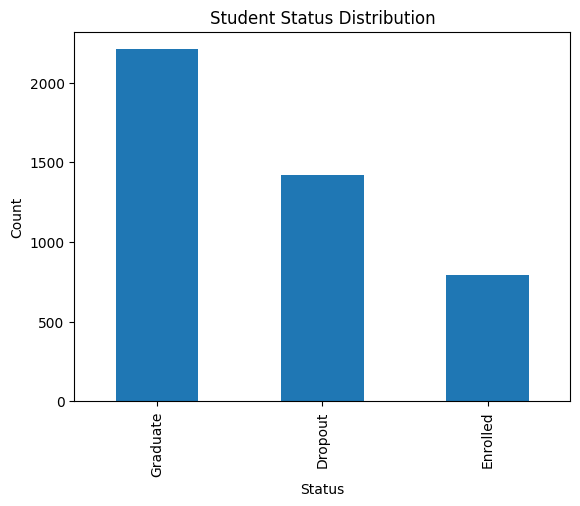

In [ ]:
### PLOT 1: Target Variable Distribution

# Access 'Target' column, counts how many time each value appears, and draw a bar chart of the counts
df['Target'].value_counts().plot(kind='bar')

# Adds title to chart
plt.title('Student Status Distribution')

# Labels the x-axis: "Status" (Dropout / Enrolled / Graduate)
plt.xlabel('Status')

# Labels the y-axis: "Count" (how many students for each category)
plt.ylabel('Count')

# Dispplay the chart
plt.show()

### Observation: Target Variable Distribution

This bar chart represents the distribution of student statuses in the dataset, categorized as **Dropout**, **Enrolled**, and **Graduate**.

Key observations:
- **Graduate** is the largest group, with over **2,000 students**, making it the most common outcome in the dataset.
- **Dropouts** are the second-largest group, with approximately **1,400 students**, highlighting that dropout is still a significant issue.
- The **Enrolled** category is the smallest, with fewer than **1,000 students**, which makes sense since these students are still in progress and haven’t yet reached graduation or dropout.

This distribution helps us understand the overall trends in student outcomes and sets the context for deeper analysis. It also highlights the importance of investigating the factors that lead students to either successfully graduate or drop out.


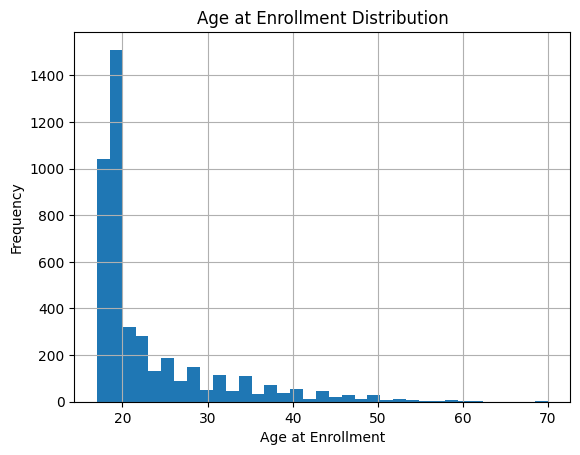

In [ ]:
### PLOT 2: Age At Enrollment Distribution

# Creates a histogram and splits the ages into 35 buckets
df['Age at enrollment'].hist(bins=35)

# Set Title
plt.title('Age at Enrollment Distribution')

# Label x-axis: Age at Enrollment
plt.xlabel('Age at Enrollment')

# Label y-axis: Frequency
plt.ylabel('Frequency')

# Display the Chart
plt.show()

### Observation: Age at Enrollment Distribution

This histogram shows the distribution of student ages at the time of enrollment.

Key observations:
- The most common age of enrollment is around **18 to 19 years old**, which is typical for students entering higher education directly after secondary school.
- After age **20**, the frequency steadily decreases, with significantly fewer students enrolling in their mid to late 20s and beyond.
- There is a **long tail** extending to older ages, including students aged **50 to 70**, indicating participation from non-traditional, likely returning or part-time students.
- The distribution is **right-skewed**, meaning the majority of students enroll at younger ages, but there remains a notable portion of mature students.


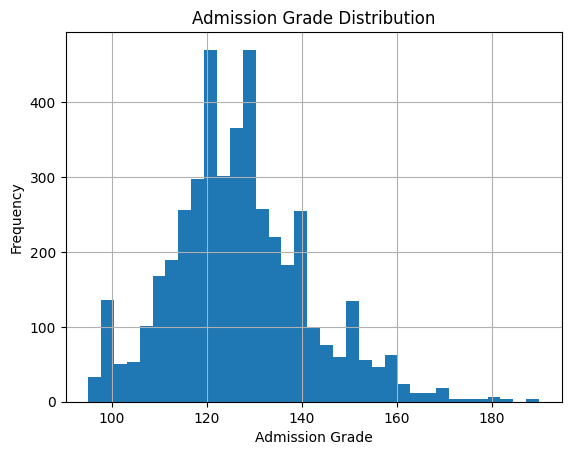

In [ ]:
# PLOT 3: Admission Grade Distribution

# Histogram of the student's admission grades
df['Admission grade'].hist(bins=35)
plt.title('Admission Grade Distribution')
plt.xlabel('Admission Grade')
plt.ylabel('Frequency')
plt.show()

### Observation: Admission Grade Distribution

This histogram displays the distribution of admission grades for students in the dataset.

Key observations:
- The distribution shows a peak around **120 to 130**, which appears to be the most common admission grade range.
- There is a long tail towards the higher grades, with some students achieving grades **above 160**, indicating high academic performance at admission.
- A few students have lower admission grades closer to **95**, which is the minimum in the dataset.
- The overall distribution is slightly **right-skewed**, meaning more students have average to below-average grades, while fewer students achieve very high scores.

This suggests that most students enter with mid-range admission grades, and only a small proportion of students have exceptionally high or low admission scores. It would be useful to explore whether admission grades correlate with final outcomes like graduation or dropout.

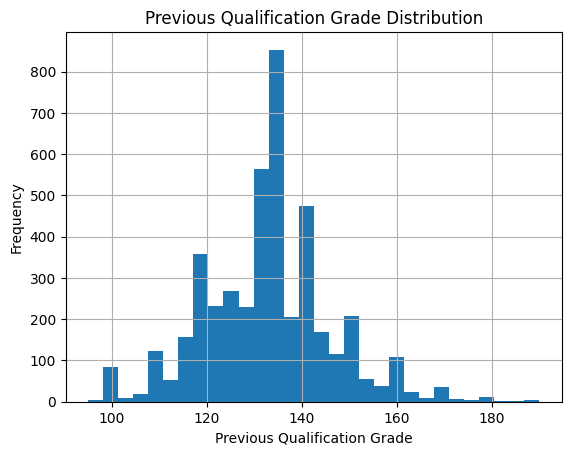

In [ ]:
# PLOT 4: Previous Qualification Grade Distribution
df['Previous qualification (grade)'].hist(bins=30)
plt.title('Previous Qualification Grade Distribution')
plt.xlabel('Previous Qualification Grade')
plt.ylabel('Frequency')
plt.show()

### Observation: Previous Qualification Grade Distribution

This histogram illustrates the distribution of students' previous qualification grades before admission.

Key observations:
- The distribution is **centered around 130 to 140**, indicating that many students had strong performance in their previous academic qualifications.
- There is a visible peak at around **135**, suggesting that this is a common benchmark grade.
- Grades extend from around **95** to over **180**, showing a wide range of academic backgrounds among students.
- Similar to the admission grade distribution, this plot is also **right-skewed**, with fewer students achieving extremely high grades.
  
The distribution indicates that the majority of students had moderately high prior academic performance, which may have influenced their chances of being admitted. Further analysis can help understand the impact of previous qualifications on academic success in the current program.


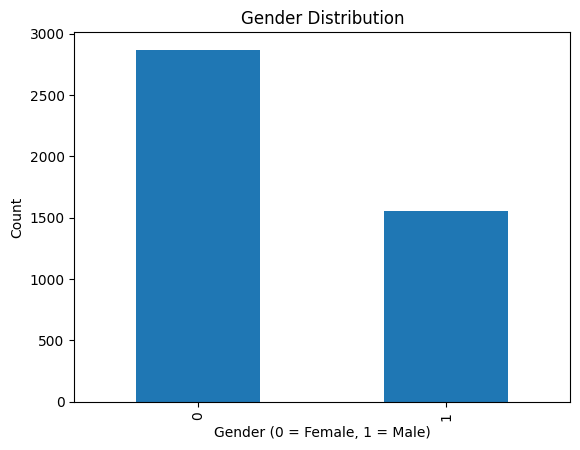

In [ ]:
# Plot5: Gender Distribution. 1: MALE , 0: FEMALE
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

### Observation: Gender Distribution

This bar chart displays the overall gender distribution in the dataset. Gender is encoded as **0 for female** and **1 for male**.

Key observations:
- There is a **larger number of female students** compared to male students in this dataset.
- Female students represent the **majority** of the total student population.
- Male students, while fewer in number, still form a significant portion of the dataset.

This imbalance in gender distribution is important to consider, as it may influence the interpretation of other variables (such as graduation or dropout rates). Further analysis could explore if this gender ratio affects academic outcomes.


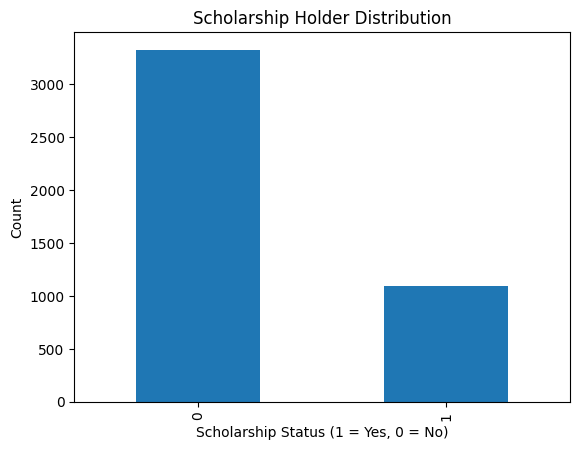

In [ ]:
# PLOT 6: Scholarship Holder
df['Scholarship holder'].value_counts().plot(kind='bar')
plt.title('Scholarship Holder Distribution')
plt.xlabel('Scholarship Status (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

### Observation: Scholarship Holder Distribution

This bar chart shows the distribution of students based on scholarship status. In the dataset, **1 indicates a student receiving a scholarship**, and **0 indicates no scholarship**.

Key observations:
- The majority of students **do not receive scholarships** (code 0).
- A smaller proportion of students **do receive scholarships** (code 1).

This indicates that most students are self-funded or have alternative funding sources. It would be valuable to explore if receiving a scholarship has an impact on student success, such as improving graduation rates or lowering the risk of dropout.


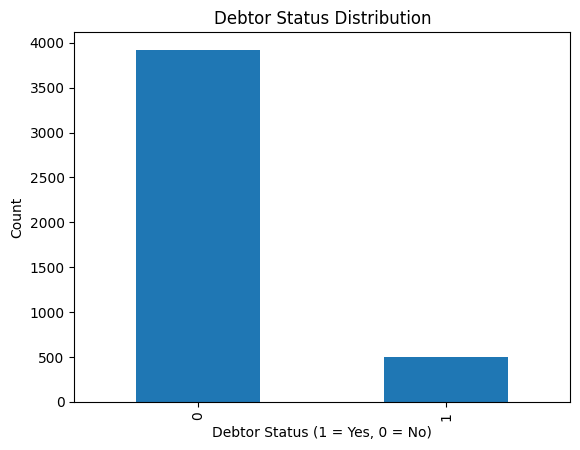

In [ ]:
# PLOT 7: Debtor
df['Debtor'].value_counts().plot(kind='bar')
plt.title('Debtor Status Distribution')
plt.xlabel('Debtor Status (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

### Observation: Debtor Status Distribution

This bar chart displays the distribution of students based on whether they are debtors or not.

Key observations:
- A large majority of students (around **3,900 out of 4,424**) are **not debtors** (marked as 0), meaning they have no outstanding debts.
- A smaller group, approximately **500 students**, are marked as **debtors** (1), indicating they owe fees.
- This indicates that while most students manage to keep their tuition payments up to date, a notable minority are facing financial obligations that could potentially impact their academic progression or risk of dropout.

Given the financial aspect of student retention, it will be valuable to investigate further whether debtor status is correlated with higher dropout rates or academic performance.


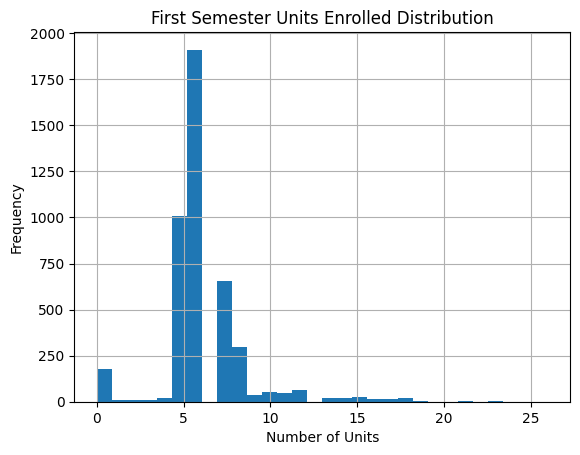

In [ ]:
# PLOT 8: Curricular Units Enrolled
df['Curricular units 1st sem (enrolled)'].hist(bins=30)
plt.title('First Semester Units Enrolled Distribution')
plt.xlabel('Number of Units')
plt.ylabel('Frequency')
plt.show()

### Observation: First Semester Units Enrolled Distribution

This histogram shows the distribution of the number of curricular units students enrolled in during their first semester.

Key observations:
- The most common enrollment load is around **5 to 7 units**, with the highest frequency at approximately **6 units**.
- A smaller group of students enrolled in fewer than 5 units, indicating **part-time or lighter course loads**.
- There is a long tail on the right, with some students enrolling in **more than 10 units**, and a few outliers reaching up to **25 units**.
- Very few students enrolled in 0 units, which could indicate **special cases or data errors** that may need further investigation.

This distribution suggests that most students follow a standard full-time course load, while some students opt for heavier or lighter loads, which could impact their academic performance and risk of dropout. Further analysis could explore the relationship between enrollment load and student outcomes.


### Correlation Heatmap

We plot a correlation heatmap to visualize the relationships between numeric features in the dataset. This helps identify which variables might be strongly related, guiding feature selection for modeling.

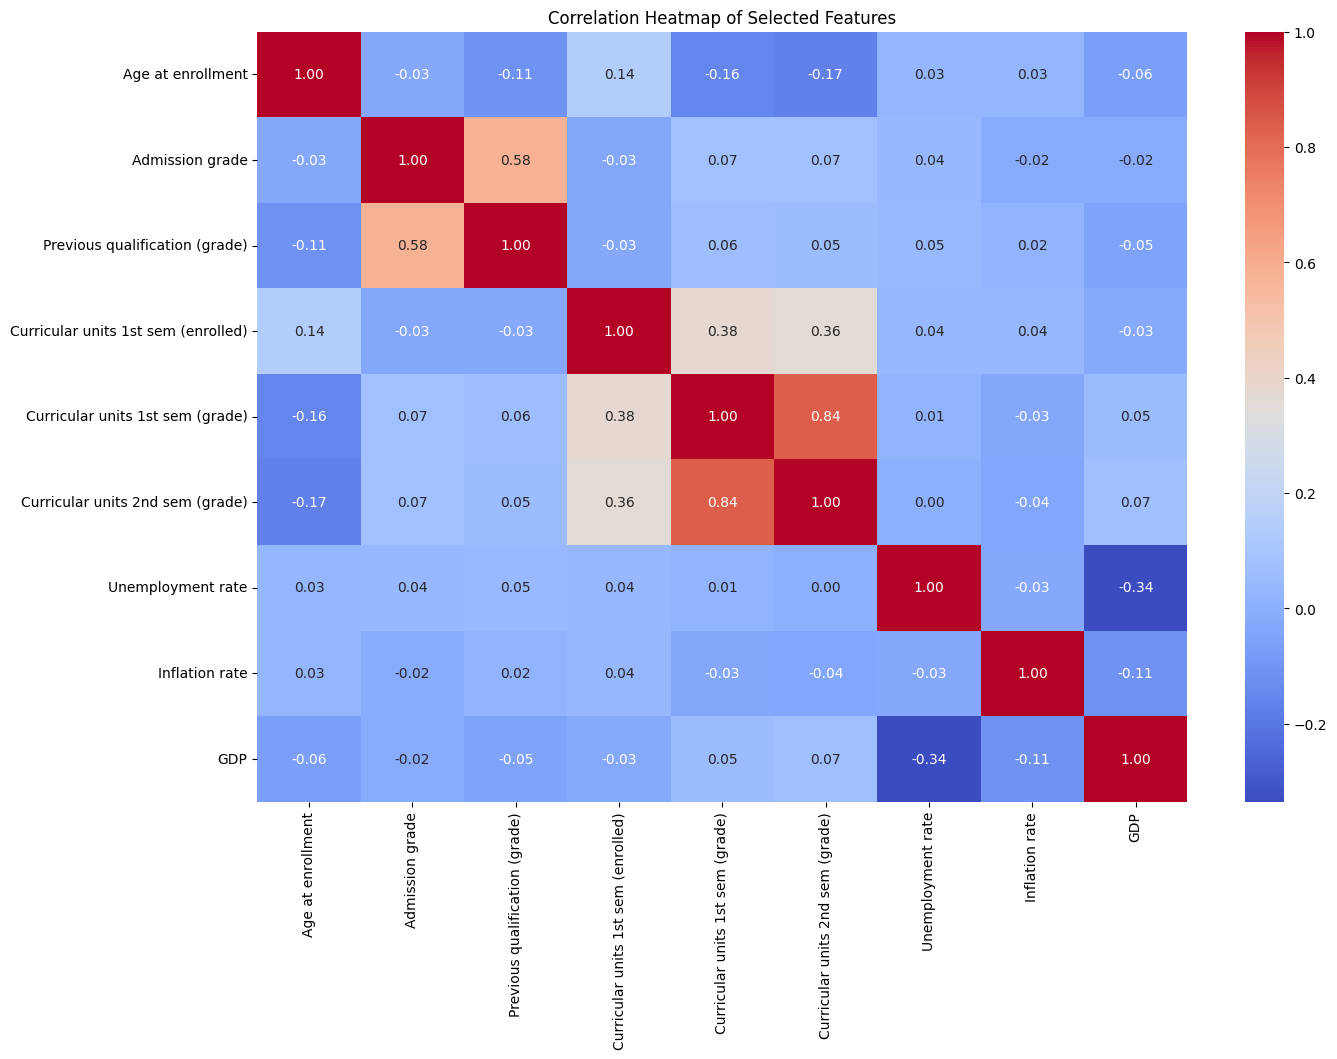

In [ ]:
# Create Heatmap
selected_features = [
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

plt.figure(figsize=(15, 10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

### Observation: Correlation Heatmap of Selected Features

The heatmap visualizes the correlations between selected numeric features in the dataset. Stronger relationships are represented by colors closer to dark red (positive correlation) or dark blue (negative correlation), while values close to zero indicate weak or no correlation.

Key observations:
- **Curricular units 1st sem (grade)** and **Curricular units 2nd sem (grade)** show a **strong positive correlation (0.84)**. This suggests that students who perform well in the first semester tend to maintain their performance in the second semester.
- **Previous qualification grade** and **Admission grade** are moderately correlated (0.58), indicating that students' prior academic achievements have some influence on their admission performance.
- **Economic factors** such as **Unemployment rate, Inflation rate, and GDP** show weak correlations with academic features, implying they may not have a strong direct influence on academic performance in this dataset.
- **Age at enrollment** and academic performance show weak to no significant correlation.
  
Overall, the heatmap helps identify features that move together and can guide feature selection in the modeling stage. Academic performance across semesters is one of the stronger relationships in the data, which could be important for predicting student outcomes.

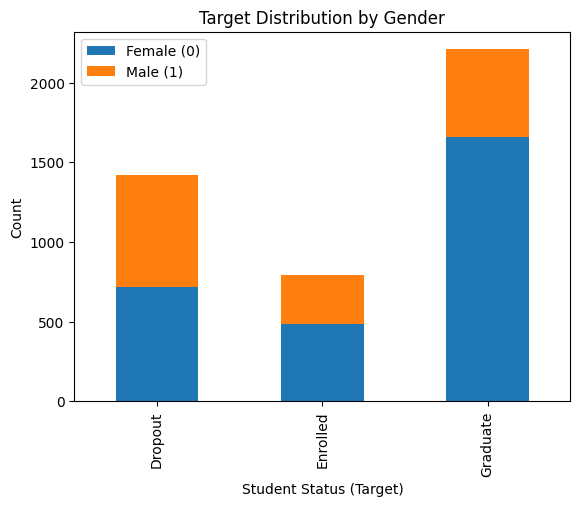

In [ ]:
# Target vs. Gender
pd.crosstab(df['Target'], df['Gender']).plot(kind='bar', stacked=True)
plt.title('Target Distribution by Gender')
plt.xlabel('Student Status (Target)')
plt.ylabel('Count')
plt.legend(['Female (0)', 'Male (1)'])
plt.show()

### Observation: Target Distribution by Gender
This stacked bar chart visualizes the distribution of student status (Target: Dropout, Enrolled, Graduate) across genders. In this dataset, gender is encoded as **0 for female** and **1 for male**.

We observe that:
- Across all categories, **females (blue) represent the majority.**
- In the **Graduated** group, the number of female students is significantly higher than male students.
- The **Dropout** category also has more females than males, but the gap is smaller compared to the graduate group.
- The **Enrolled** category (currently active students) shows a relatively balanced distribution, with a slight female majority.

These insights suggest that while females make up the majority of the overall student population, they also achieve higher graduation rates compared to males. However, since dropout numbers for females are also higher in total count, this could reflect the overall higher female population in the dataset rather than an increased risk of dropout. A **proportional analysis** would be helpful to confirm this trend.


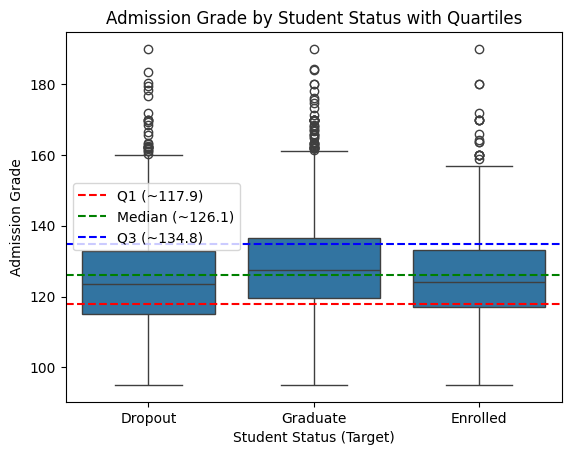

In [ ]:
# Target vs. Admission Grade
sns.boxplot(x='Target', y='Admission grade', data=df)
plt.axhline(y=117.9, color='red', linestyle='--', label='Q1 (~117.9)')
plt.axhline(y=126.1, color='green', linestyle='--', label='Median (~126.1)')
plt.axhline(y=134.8, color='blue', linestyle='--', label='Q3 (~134.8)')
plt.legend()
plt.title('Admission Grade by Student Status with Quartiles')
plt.xlabel('Student Status (Target)')
plt.ylabel('Admission Grade')
plt.show()

### Observation: Admission Grade by Student Status

In this plot, we compare admission grades across student statuses (**Dropout, Graduate, Enrolled**). The boxplot is enhanced with reference lines for the first quartile (**Q1 ≈ 117.9**), the median (**≈ 126.1**), and the third quartile (**Q3 ≈ 134.8**) to provide better clarity.

The majority of students' admission grades fall between Q1 and Q3, ranging roughly from **118 to 135**. The median is approximately **126**, consistent across all student categories. While graduates show a slightly higher median compared to dropouts and enrolled students, the difference is modest, indicating that **admission grade alone may not strongly predict student status.**

Notably, we observe several high-grade outliers **above ~160** in all categories, reflecting students with exceptional admission performance. However, there are **no low outliers below the lower whisker**, as the minimum admission grade in the dataset is **95**. This suggests that while high admission grades are present, they are **not exclusive to any specific student outcome**.


### Feature Scaling (Normalization)

We apply StandardScaler to continuous numeric features to ensure they are on a similar scale. This is especially helpful for models like Logistic Regression, which are sensitive to feature scales.

Categorical features such as Gender, Debtor, Scholarship holder, and Target are not scaled, as they represent category labels rather than continuous quantities.

Features normalized include:
- Age at enrollment
- Admission grade
- Previous qualification (grade)
- Curricular units enrolled and grade
- Unemployment rate, inflation rate, and GDP

In [ ]:
# Normalizing Numeric Features for Logistic Regression
from sklearn.preprocessing import StandardScaler

# List of numeric features to scale
numeric_features = [
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Check scaled features
print("Scaled features preview:")
print(df[numeric_features].head())

Scaled features preview:
   Age at enrollment  Admission grade  Previous qualification (grade)  \
0          -0.430363         0.022229                       -0.804841   
1          -0.562168         1.071926                        2.076819   
2          -0.562168        -0.150419                       -0.804841   
3          -0.430363        -0.509526                       -0.804841   
4           2.864765         1.002867                       -2.473171   

   Curricular units 1st sem (enrolled)  Curricular units 1st sem (grade)  \
0                            -2.528560                         -2.197102   
1                            -0.109105                          0.693599   
2                            -0.109105                         -2.197102   
3                            -0.109105                          0.575611   
4                            -0.109105                          0.349468   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (grade)  \
0  

## Final Data Visualization and Comments

In this section, we summarize the key findings from our exploratory data analysis. Through various visualizations, we explored the distributions and relationships of important features in the dataset to understand the factors that may influence student success, dropout, or enrollment continuation.

### 1. Target Variable Distribution

- Most students in the dataset are **graduates**, followed by **dropouts**, and lastly **enrolled students**.
- The large number of graduates provides a good sample size, while the number of dropouts remains significant for analysis.

### 2. Age at Enrollment Distribution

- The majority of students enroll at **around 18 to 19 years old**, typical for university entry.
- There is a noticeable drop-off after age 20, though we do see non-traditional learners even up to **70 years old**.
- The distribution is **right-skewed**, indicating more young students but still a range of older participants.

### 3. Admission Grade Distribution

- Most admission grades fall between **120–130**.
- There is a tail towards higher grades (above **160**) and fewer low scores (~95 minimum).
- This suggests that while most students enter with average grades, there are standout performers across all categories.

### 4. Previous Qualification Grade Distribution

- Previous academic grades cluster around **130–140**, indicating good prior academic performance.
- Similar to admission grades, the distribution is slightly **right-skewed** with fewer extreme values.
- Prior performance likely influenced admission success but will need further testing for its impact on final outcomes.

### 5. Gender Distribution

- There is a higher proportion of **female students** in the dataset.
- This imbalance is important as it may influence outcomes and should be considered in model interpretation.

### 6. Scholarship Holder Distribution

- Most students **do not receive scholarships**, while a smaller portion benefits from them.
- Scholarships may help retention, so it will be valuable to test their influence during modeling.

### 7. Debtor Status Distribution

- The majority of students **are not debtors**, but around **500 students** carry outstanding debts.
- Financial stress could influence dropout risk, making this a feature worth exploring.

### 8. First Semester Units Enrolled

- Most students enrolled in **5–7 units** during their first semester.
- Some students took fewer units, possibly part-time students, while a few enrolled in **more than 10 units**.
- Course load may correlate with academic stress and performance, which is worth analyzing.

### 9. Correlation Heatmap

- A strong correlation (~0.84) exists between **first and second semester grades**, indicating consistent academic performance.
- **Previous qualification grade** correlates moderately (~0.58) with **admission grade**.
- Economic factors like **GDP and unemployment rate** show **weak correlations** with academic performance in this dataset.
- Overall, academic performance across semesters stands out as a meaningful factor.

### 10. Target Distribution by Gender (Stacked Bar Chart)

- Female students form the majority across all outcomes, especially in the **graduate group**.
- Dropout numbers are also higher for females, but this reflects the higher female population overall.
- The enrolled group is relatively balanced, with a slight female majority.
- To fully understand gender impact, a proportional analysis would be useful.

### 11. Admission Grade by Student Status (Boxplot with Quartiles)

- Median admission grades are similar across all groups (~126).
- The range between first quartile (~117.9) and third quartile (~134.8) is consistent.
- High-performing outliers exist in all categories, suggesting admission grade alone does not predict student outcomes.
- No low outliers below the whisker (~95), indicating admission criteria are consistent.

---

### Overall Summary

Our visual exploration of the dataset reveals:

- **Academic performance** (grades and course load) appears to be a significant factor.
- **Financial factors** (debtor status, scholarship) show potential influence on outcomes.
- **Demographic factors** like age and gender show patterns worth further investigation.
- **Economic indicators** are less directly related to student success in this dataset.

## Next Steps for the Project

With the dataset now prepared and initial exploratory data analysis completed, the following steps will be taken to continue the project and align with the objectives outlined in the proposal:

1. **Class Imbalance Handling:**
   - Use SMOTE (Synthetic Minority Over-sampling Technique) to address any class imbalance in the target variable and ensure better model performance.

2. **Model Training:**
   - Train baseline models including Logistic Regression and XGBoost to predict student outcomes (Dropout, Enrolled, Graduate).

3. **Model Evaluation:**
   - Evaluate models using accuracy, precision, recall, and F1-score to determine effectiveness.
   - Compare model performances to select the best-performing algorithm.

4. **Model Optimization:**
   - Apply hyperparameter tuning techniques such as GridSearchCV to optimize model parameters for better results.

5. **Model Interpretability:**
   - Use SHAP values to interpret model predictions and understand the importance of each feature in influencing student outcomes.

6. **Feature Importance Analysis:**
   - Rank features by their importance in the predictive models to identify which factors have the most significant impact on student dropout and success.

7. **Actionable Recommendations:**
   - Based on the model findings, provide clear, data-driven recommendations for educational institutions to improve student retention and reduce dropout rates.

These next steps will complete the modeling phase of the project and deliver valuable insights to help address the issue of student dropout effectively.

## Handling Class Imbalance (Class Weights)

Before proceeding with model training, we checked the class distribution in the training data to detect any imbalance.
An imbalanced dataset can cause models to perform poorly on underrepresented classes by favoring the majority class.

We found the following class proportions:

In [ ]:
# Separate features and labels
X = df.drop('Target', axis=1) # Features
y = df['Target']  # Target (Dropout / Enrolled / Graduate)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,            # 20% for testing
    random_state=42,          # for reproducabulity
    stratify=y)               # To keep the same class ratio

print("Class distribution before Class Weights (%):")
print((y_train.value_counts(normalize=True) * 100).round(2))

Class distribution before Class Weights (%):
Target
Graduate    49.93
Dropout     32.13
Enrolled    17.94
Name: proportion, dtype: float64


### Applying Class Weights

To address this, we used class weights during model training. This method increases the importance of underrepresented classes (like Enrolled) without modifying the data itself.

Using class weights ensures that the model pays more attention to minority classes, helping reduce bias toward the majority class and improving the model's ability to accurately predict all outcomes.

In [ ]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# Convert to regular floats
class_weights = {k: float(v) for k, v in class_weights.items()}
print("Class weights (rounded):", {k: round(v, 2) for k, v in class_weights.items()})

# Map weights to each sample
sample_weights = y_train.map(class_weights)

Class weights (rounded): {'Dropout': 1.04, 'Enrolled': 1.86, 'Graduate': 0.67}


# Convert text labels to numbers for XGBoost Model

In [ ]:
le = LabelEncoder()

# Fit on original (non-balanced) training labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


### Create XGBoost Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the model
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Define your parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 150]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_weighted',  # or 'accuracy', 'f1_macro', etc.
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Train with sample weights
grid.fit(X_train, y_train_encoded, sample_weight=sample_weights)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Use the best model
best_xgb = grid.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: 0.7654536887809843


### Prediction XGBoost & Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_xgb.predict(X_test)

print("Classification Report:\n", classification_report(y_test_encoded, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       284
           1       0.45      0.65      0.53       159
           2       0.85      0.80      0.82       442

    accuracy                           0.74       885
   macro avg       0.71      0.71      0.70       885
weighted avg       0.77      0.74      0.75       885

Confusion Matrix:
 [[195  56  33]
 [ 25 103  31]
 [ 15  72 355]]


### Decoding Predictions

In [ ]:
y_pred_xgb = best_xgb.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb_decoded = le.inverse_transform(y_pred_xgb)

# Decode the true labels
y_test_decoded = le.inverse_transform(y_test_encoded)

# Show real vs predicted for first 20 students
for true_label, pred_label in zip(y_test_decoded[:20], y_pred_xgb_decoded[:20]):
    print(f"Real: {true_label}  -->  Predicted: {pred_label}")

Real: Graduate  -->  Predicted: Graduate
Real: Graduate  -->  Predicted: Graduate
Real: Enrolled  -->  Predicted: Dropout
Real: Graduate  -->  Predicted: Graduate
Real: Graduate  -->  Predicted: Graduate
Real: Graduate  -->  Predicted: Enrolled
Real: Graduate  -->  Predicted: Graduate
Real: Graduate  -->  Predicted: Graduate
Real: Graduate  -->  Predicted: Graduate
Real: Graduate  -->  Predicted: Graduate
Real: Graduate  -->  Predicted: Graduate
Real: Enrolled  -->  Predicted: Enrolled
Real: Dropout  -->  Predicted: Dropout
Real: Dropout  -->  Predicted: Enrolled
Real: Enrolled  -->  Predicted: Enrolled
Real: Enrolled  -->  Predicted: Enrolled
Real: Graduate  -->  Predicted: Enrolled
Real: Enrolled  -->  Predicted: Dropout
Real: Dropout  -->  Predicted: Dropout
Real: Dropout  -->  Predicted: Dropout


### Print Confusion Matrix

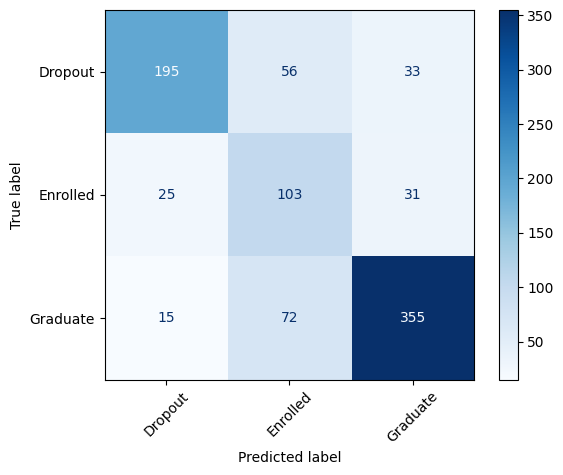

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_decoded, y_pred_xgb_decoded, labels=[
    'Dropout', 'Enrolled', 'Graduate'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'Dropout', 'Enrolled', 'Graduate'])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()

# Final XGBoost Summary (After Tuning with Class Weights & GridSearchCV)
For this part of the project, I worked on preparing the data and building a baseline model using XGBoost. After loading the dataset, I cleaned up the column names to ensure consistency, then separated the features and the target variable. I split the data into 80% training and 20% testing while keeping the original class ratios by using stratification.

Before training, I checked the class distribution and found that the dataset was imbalanced, with about 50% Graduates, 32% Dropouts, and only 18% Enrolled. To address this, I applied class weights during model training instead of using oversampling techniques like SMOTE. This allowed the model to give more importance to underrepresented classes (like Enrolled) without modifying the original dataset.

I used LabelEncoder to convert the target labels into numeric values, since XGBoost requires numeric input. Then I trained the XGBoost model using the original training data along with the computed class weights. During the process, I ran into a small issue where I accidentally typed "Graduated" instead of "Graduate" when setting up the confusion matrix, but after correcting it, the results made sense.

For initial evaluation, the XGBoost model reached about 76% test accuracy. It performed well when predicting Graduates and Dropouts, but initially struggled with Enrolled students. To improve performance, I applied GridSearchCV to tune hyperparameters such as max_depth, learning_rate, and n_estimators, while continuing to use class weights.

This tuning led to a major improvement in the model’s ability to correctly classify Enrolled students:

Before tuning: 86 Enrolled students correctly predicted, F1-score = 0.50, Recall = 0.54
After tuning: 103 Enrolled students correctly predicted, F1-score = 0.53, Recall = 0.65
This was the best Enrolled-class performance across all models tested, including the baseline XGBoost and logistic regression. While Graduate precision and recall slightly decreased after tuning (from 0.85 to 0.80), the trade-off was worth it, as the model became more balanced across all classes. The overall weighted F1-score stayed strong at 0.75, confirming that tuning improved Enrolled-class performance without harming the model’s general effectiveness.

The confusion matrix confirmed this improvement, showing fewer misclassifications in the Enrolled class. The tuned model also trained efficiently and performed consistently, thanks to the combination of class weighting and hyperparameter optimization.

Moving forward, I may explore feature selection and ensemble methods to further refine predictions. One final note is that we left the test set untouched, so the evaluation remains realistic, and decoding the predictions into readable labels helped a lot when analyzing the confusion matrix and the model’s behavior overall.

# Logistic Regression

In [ ]:
logistic_model = LogisticRegression(random_state=16, solver='liblinear')

# Train on the original X_train and encoded labels
logistic_model.fit(X_train, y_train_encoded)

LogisticRegression(random_state=16, solver='liblinear')

In [ ]:
y_pred_logistic = logistic_model.predict(X_test)

print("Classification Report (Logistic Regression): ")
print(classification_report(y_test_encoded, y_pred_logistic))


Classification Report (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       284
           1       0.52      0.21      0.30       159
           2       0.77      0.95      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.65      0.65       885
weighted avg       0.74      0.76      0.73       885



## Confusion Matrix

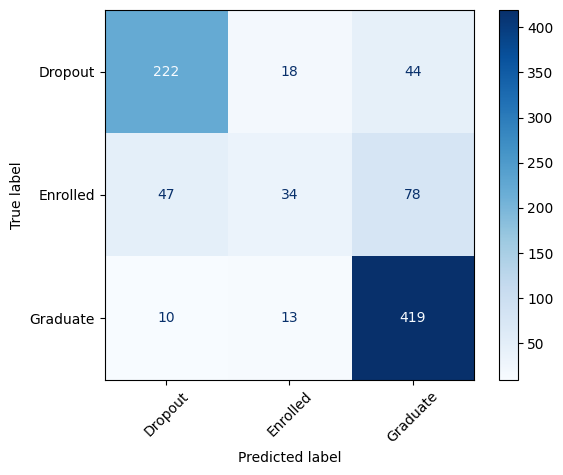

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred_logistic, labels=[
    0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'Dropout', 'Enrolled', 'Graduate'])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()

## Logistic Regression summary
This part of the code trains and evaluates the dataset using a logistic regression model. First, a LogisticRegression model is instantiated with a fixed random seed and the liblinear solver. The model is then trained on the original training set using label-encoded target values — no oversampling or data balancing was applied.

After training, the logistic regression model achieved approximately 76% test accuracy, which was comparable to the XGBoost model. It performed especially well at predicting the Graduate class, reaching a recall of 0.95, which was the highest recall among all models and classes. The Dropout class also performed reasonably well, with a solid balance between precision and recall. However, the model struggled with the Enrolled class, producing a recall of only 0.21, which indicates it missed many students in that group.

The confusion matrix confirms this behavior: while most Graduates were correctly predicted, many Enrolled students were misclassified as Dropouts or Graduates. Despite this weakness, the logistic regression model trained and predicted very efficiently, providing a simple yet effective baseline for comparison against more complex models like XGBoost.

### Overall Summary
For this project, we prepared and cleaned a student dataset to predict whether a student would drop out, remain enrolled, or graduate. After loading the data and renaming columns for consistency, we split the dataset into training and testing sets (80/20) using stratification to preserve the class distribution.

We explored the data through visualizations, including distributions of target status, age at enrollment, admission grades, previous grades, scholarship status, debtor status, and course load. A correlation heatmap was also created to highlight potential relationships between variables.

Before modeling, we observed a class imbalance — around 50% of students were Graduates, 32% Dropouts, and 18% Enrolled. To address this without altering the data, we used class weights during model training. This approach penalized errors on underrepresented classes more heavily, helping the model pay attention to minority groups without introducing synthetic samples.

Two baseline models were trained: XGBoost and Logistic Regression.

XGBoost achieved ~76% accuracy and performed best on the Graduate and Dropout classes, but struggled with Enrolled students.
Logistic Regression also reached ~76% accuracy and achieved the highest recall for Graduates (0.95), but had the weakest performance on the Enrolled class, with a recall of just 0.21.
Both models were evaluated using classification reports and confusion matrices. One small challenge encountered was correcting a label mismatch in the confusion matrix due to using "Graduated" instead of "Graduate", which was quickly resolved. Execution time for both models was fast, and using class weights avoided unnecessary complexity while still improving performance over an unweighted approach.

Looking ahead, we plan to experiment with hyperparameter tuning (e.g., GridSearchCV) and feature selection to improve prediction accuracy. If needed, ensemble methods may also be explored. Overall, the models provide a strong baseline, and the project is progressing well toward building a tool that can help identify at-risk students early based on interpretable machine learning predictions.

# Shap

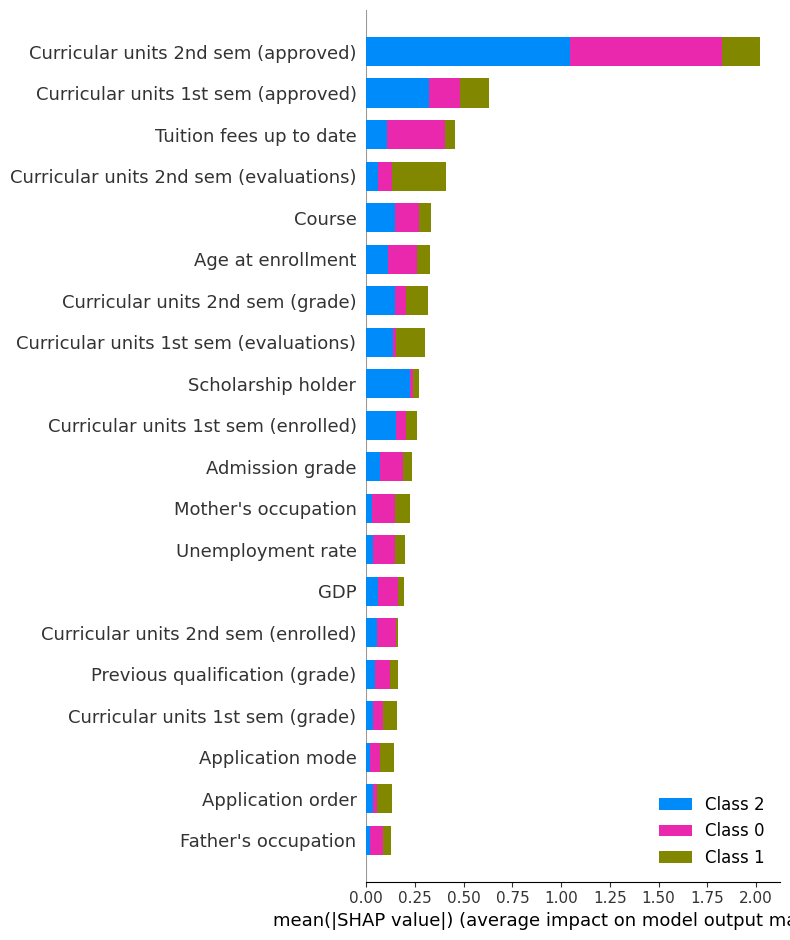

In [ ]:
# Select a small sample for speed
X_sample = X_test.sample(100, random_state=42)

# Explain model predictions using SHAP
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_sample)

# Plot summary
shap.summary_plot(shap_values, X_sample)

Using SHAP, we found that the most influential features were related to academic performance, especially the number of curricular units approved in both semesters. Financial stability, as indicated by whether tuition fees were up to date, also played a significant role. The student’s course and level of academic engagement (measured by evaluations) were other top predictors. These findings align with our expectations: students who pass more classes and stay financially stable are more likely to graduate, while those who struggle early on are at greater risk of dropping out.